Optimization terminated successfully.
         Current function value: 7.879288
         Iterations: 5
         Function evaluations: 293
a1 is 0.996051, a2 is -0.247906, a3 is 1.488037


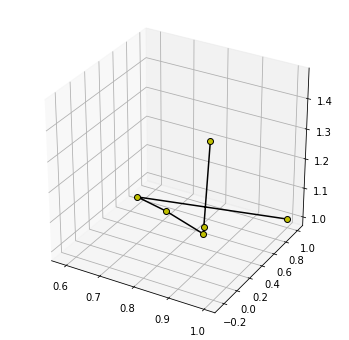

In [62]:
from scipy.optimize import minimize 

TOL = 1e-10
x, y, sigma = np.loadtxt('final-p3.txt', unpack=True, usecols=[0, 1, 2])

def xi_func(dot):
    global x,y,sigma
    a1 = dot[0]
    a2 = dot[1]
    a3 = dot[2]
    hap = 0
    for i in range(200): #200은 data size
        plus = ((y[i]-(a1+a2*x[i]+a3*x[i]**2))/sigma[i])**2
        hap = hap + plus
    return hap

def callbackF(x): 
    global a1t, a2t, a3t
    a1t.append(x[0])
    a2t.append(x[1])
    a3t.append(x[2])
    
x0=np.array([1,1,1]) 
a1t, a2t, a3t=[x0[0]],[x0[1]], [x0[2]] 
res = minimize(xi_func, x0, method='Powell',options={'xtol': TOL, 'disp': True},callback=callbackF)
from mpl_toolkits import mplot3d 
fig = plt.figure(figsize=(6, 6)) 
ax = plt.axes(projection='3d' )
ax.plot3D(a1t, a2t, a3t,c='k' ,marker='o' ,markerfacecolor='y' )
print("a1 is {:5f}, a2 is {:5f}, a3 is {:5f}".format(a1t[-1], a2t[-1], a3t[-1]))

[3.20435466e-06 3.20435466e-06 0.00000000e+00 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]


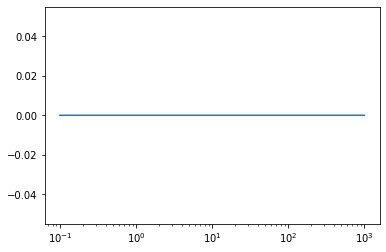

In [60]:
G=6.67384e-8
kB=1.3806488e-16
eV=1.60217733e-9
Msol=1.989e33
pc=3.085677e18
mH=1.6735575-24

rc=23000*pc
rs=20*rc
M0=6.6e14*Msol
T0=2000*eV
ne0=0.05

def deriv(q,r):
    phi,dphi,ne,T,dT=q
    d2phi=-2/r*dphi+2*G*M0/(r+rc)/(r+rs)**2
    
    rho=1.18*mH*ne
    L=2.1e-27*ne**2*T**0.5
    k=1.0e-7*T**2.5
    dk=2.5e-7*T**1.5*dT
    
    d2T=(L-dk*dT-2/r*k*dT)/k
    
    dne=(-rho*dphi/1.9/kB-ne*dT)/T
    
    return [dphi,d2phi,dne,dT,d2T]

r=np.linspace(100,1.e6,100000)*pc
qini=[0,0,ne0,T0,0]
phiOut,dphiOut,neOut,TOut,dTOut=odeint(deriv,qini,r).T
print(TOut)
plt.plot(r/1000/pc,phiOut)
plt.xscale('log')

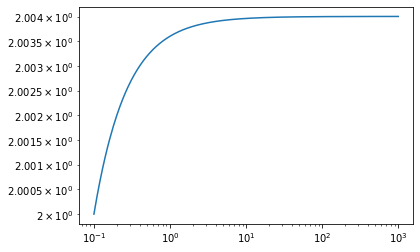

In [58]:
from scipy.integrate import odeint


kb = 1.3807 * 10**-16 
M0 = 1.312*10**48
rc = 7.097*10**22
rs = 20*rc
G = 6.6725*10**-8
mH = 1.674*10**-24
c1 = 1e-7
c2 = 2.1*10**-27




def deriv(y, r):
    phi, phi_prime, n_e, T, T_prime = y[0], y[1], y[2], y[3], y[4]
    
    dydt0 = phi_prime
    dydt1 = 2*G*M0/((r+rc)+(r+rs)) -(2/r)*phi_prime
    dydt2 = (-1.18*n_e*mH-1.9*T_prime*kb*n_e)/(1.9*kb*T)
    dydt3 = T_prime
    dydt4 = (-2*r*c1*T**(5/2)*T_prime+c2*n_e**2*T**0.5*r**2)/(r**2*c1*(5/2)*T**1.5+r**2*c1*T**2.5)
    return [dydt0, dydt1, dydt2, dydt3, dydt4]




rini = 3.09*10**20
rmax = 3.086 *10**24
n = 100000

# 2 keV = 3.204 * 10**-9 ergs or 11,600*2 K
# 0.1kpc = 3.09*10**20
# 1Mpc = 3.086 *10**24




yini = np.array([0, 0 ,0.05, 11600*2, 0])
r = np.linspace(rini, rmax, n)
y = odeint(deriv, yini, r)
phi = y[:,0]
phi_prime = y[:,1]
n_e = y[:,2]
T = y[:,3]
T_prime = y[:,4]

T_keV = T/11600
r_kpc = r/(3.086*10**21)



plt.plot(r_kpc, T_keV)
plt.xscale('log')
plt.yscale('log')

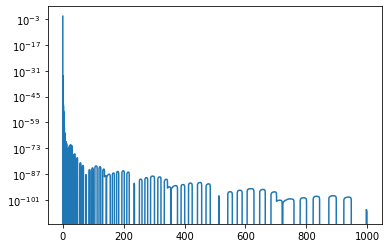

In [59]:
plt.plot(r_kpc, n_e)
plt.yscale('log')


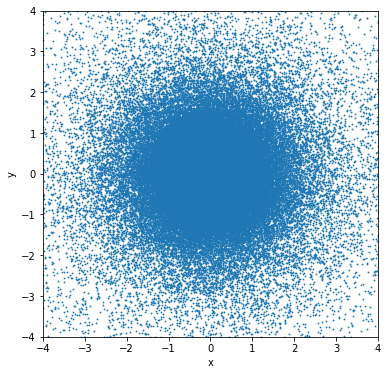

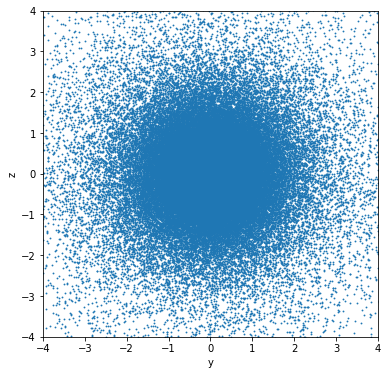

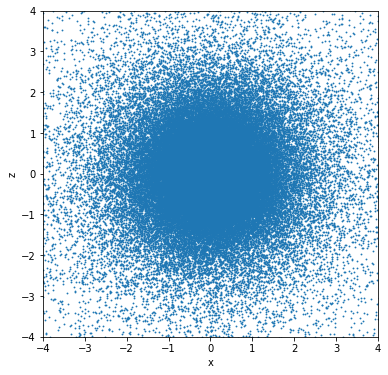

[  0   1   0   3   5   6  15  18  14  30  30  39  42  56  74  73  82  96
  93 107 121 127 127 148 162 191 197 189 221 231 213 233 266 284 257 302
 278 323 350 327 365 374 378 412 395 394 407 418 464 442 442 475 449 454
 436 447 529 527 493 522 553 500 506 536 522 547 519 524 590 574 576 529
 578 561 580 567 591 537 604 600 531 565 518 552 563 533 573 583 570 597
 619 514 568 563 562 530 538 533 517]
[0.         0.01010101 0.02020202 0.03030303 0.04040404 0.05050505
 0.06060606 0.07070707 0.08080808 0.09090909 0.1010101  0.11111111
 0.12121212 0.13131313 0.14141414 0.15151515 0.16161616 0.17171717
 0.18181818 0.19191919 0.2020202  0.21212121 0.22222222 0.23232323
 0.24242424 0.25252525 0.26262626 0.27272727 0.28282828 0.29292929
 0.3030303  0.31313131 0.32323232 0.33333333 0.34343434 0.35353535
 0.36363636 0.37373737 0.38383838 0.39393939 0.4040404  0.41414141
 0.42424242 0.43434343 0.44444444 0.45454545 0.46464646 0.47474747
 0.48484848 0.49494949 0.50505051 0.51515152 0.52525253 0.535

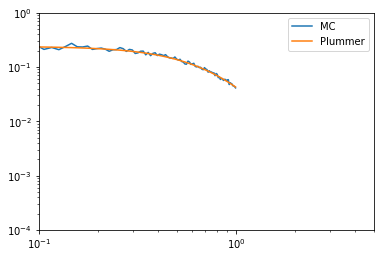

In [46]:

n = 10**5
mass = 1/n

r1 =np.random.rand(n)
r2 = np.random.rand(n)
r3= np.random.rand(n)


rds = 1/(np.sqrt(r1**(-2/3)-1))
theta = np.arccos(2*r2-1)
phi = 2*np.pi*r3

x = rds*np.sin(theta) * np.cos(phi)
y = rds*np.sin(theta) * np.sin(phi)
z = rds*np.cos(theta)

r = np.sqrt(x**2 + y**2 + z**2)

fig= plt.figure(1, figsize=(6,6))

plt.scatter(x, y, s=0.7)
plt.xlim(-4, 4)
plt.ylim(-4,4)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

fig= plt.figure(1, figsize=(6,6))

plt.scatter(y,z, s=0.7)
plt.xlim(-4, 4)
plt.ylim(-4,4)
plt.xlabel('y')
plt.ylabel('z')
plt.show()

fig= plt.figure(1, figsize=(6,6))

plt.scatter(x,z, s=0.7)
plt.xlim(-4, 4)
plt.ylim(-4,4)
plt.xlabel('x')
plt.ylabel('z')
plt.show()


nbin, rmin, rmax = 100, 0, 1
bin = np.linspace(rmin, rmax, nbin)
freq, bin_edges = np.histogram(r, bin)
print(freq)
print(bin_edges)
avg_r = 0.5*(bin_edges[1:]+bin_edges[0:nbin-1])
print(avg_r)
dr = (rmax - rmin)/(nbin-1)
# den = freq/float(n)/avg_r**2/(4*np.pi*dr)
den = ((freq*(1/n))/dr)*(1/(4*np.pi*avg_r**2))

a = 1
M = 1
rhof = 3*M*a**2/(np.pi*4*pow(a**2+avg_r**2, 2.5))

plt.yscale('log')
plt.xscale('log')
plt.plot(avg_r, den, label = 'MC')
plt.plot(avg_r, rhof, label = 'Plummer')
plt.xlim(0.1, 5)
plt.legend()
plt.ylim(10**-4, 1)
print(n)




In [ ]:
rho_data = [0]
r_data1 = [0]+new_rlist
plotting_rdata = [0]

n = 10**5
mass = 1/n 

for j in range(2000):
    count = 0
    for i in range(1, np.size(r_data)):
        if 0.001*j<r_data[i]<0.001*(j+1):
            count = count +1
    rho_data.append(count*mass/(4/3 * np.pi *(0.001*(j+1))**3-(0.001*j)**3))
    plotting_rdata.append(0.001*j)

In [ ]:
rho_data = [0]
r_data1 = [0]+new_rlist
plotting_rdata = [0]

n = 10**5
mass = 1/n 

for j in range(20):
    count = 0
    for i in range(1, np.size(r_data1)):
        if 0.1*j<r_data1[i]<0.1*(j+1):
            count = count +1
    rho_data.append(count*mass/(4/3 * np.pi *(0.1*(j+1))**3-(0.1*j)**3))
    plotting_rdata.append(0.1*j)
    print(count)

plt.plot(plotting_rdata, rho_data)

In [44]:
# 누적 분포식 r 계산
mass_data = [0]
rho_data = [0]
r_data = [0]+new_rlist

n = 10**5
mass = 1/n

for i in range(1, np.size(r_data)):
    mass_data.append(mass*i)
    rho_data.append((mass*i)/(4/3 * np.pi * r_data[i]**3))
plt.scatter(r_data, rho_data, s = 1)

NameError: name 'new_rlist' is not defined

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore' )

Optimization terminated successfully.
         Current function value: 7.879288
         Iterations: 5
         Function evaluations: 293
a1 is 0.996051, a2 is -0.247906, a3 is 1.488037


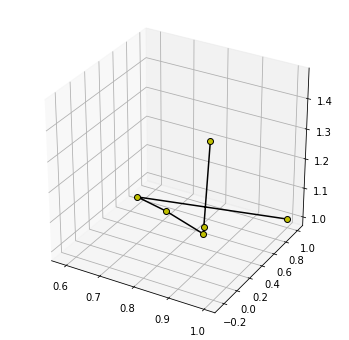

In [10]:
from scipy.optimize import minimize 

TOL = 1e-10
x, y, sigma = np.loadtxt('final-p3.txt', unpack=True, usecols=[0, 1, 2])

def xi_func(dot):
    global x,y,sigma
    a1 = dot[0]
    a2 = dot[1]
    a3 = dot[2]
    hap = 0
    for i in range(200): #200은 data size
        plus = ((y[i]-(a1+a2*x[i]+a3*x[i]**2))/sigma[i])**2
        hap = hap + plus
    return hap

def callbackF(x): 
    global a1t, a2t, a3t
    a1t.append(x[0])
    a2t.append(x[1])
    a3t.append(x[2])
    
x0=np.array([1,1,1]) 
a1t, a2t, a3t=[x0[0]],[x0[1]], [x0[2]] 
res = minimize(xi_func, x0, method='Powell',options={'xtol': TOL, 'disp': True},callback=callbackF)
from mpl_toolkits import mplot3d 
fig = plt.figure(figsize=(6, 6)) 
ax = plt.axes(projection='3d' )
ax.plot3D(a1t, a2t, a3t,c='k' ,marker='o' ,markerfacecolor='y' )
print("a1 is {:5f}, a2 is {:5f}, a3 is {:5f}".format(a1t[-1], a2t[-1], a3t[-1]))

best-fit parameters a1 = 0.99377, a2 = -0.21299, a3 = 1.473951


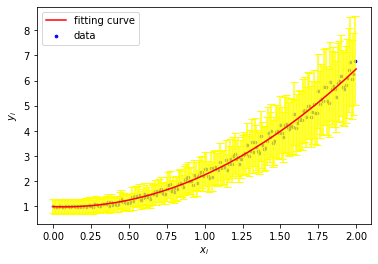

In [15]:
x, y, sigma = np.loadtxt('final-p3.txt', unpack=True, usecols=[0, 1, 2])

a3 = np.polyfit(x,y,2)[0]
a2 = np.polyfit(x,y,2)[1]
a1 = np.polyfit(x,y,2)[2]



print("best-fit parameters a1 = {:.5f}, a2 = {:.5f}, a3 = {:5f}".format(a1,a2,a3))

def lagpol(x, y, deg):
    p = np.polyfit(x, y, deg)    
    poly = np.poly1d(p)         
    return poly

x1 = np.linspace(0, 2, 100)
plt.errorbar(x,y,yerr = sigma, linestyle='None', capsize=4, color = 'yellow')
plt.plot(x1, lagpol(x, y, 2)(x1), label='fitting curve', color = 'red')
plt.scatter(x,y, s=7, color='blue', label = 'data')
plt.xlabel('$x_{i}$')
plt.ylabel('$y_{i}$')
plt.plot(x1, a1+a2*x1+a3*x1**2, color = 'black')
plt.legend()

In [ ]:
def func(dot):
    global x, y
    a1 = dot[0]
    a2 = dot[1]
    a3 = dot[2]
    hap = 0
    for i in range(200): #200은 data size
        plus = ((y[i]-(a1+a2*x[i]+a3*x[i]**2))/sigma[i])**2
        hap = hap + plus
    return hap

In [37]:
x, y, sigma = np.loadtxt('final-p3.txt', unpack=True, usecols=[0, 1, 2])

def func(dot):
    global x, y
    a1 = dot[0]
    a2 = dot[1]
    a3 = dot[2]
    hap = 0
    for i in range(200): #200은 data size
        plus = ((y[i]-(a1+a2*x[i]+a3*x[i]**2))/sigma[i])**2
        hap = hap + plus
    return hap


def golden2D(x,dr,tol):
    R,err,loop=0.61803399, 10. , -1 
    a,b=x-dr,x+dr # initialize the range 
    while(err > TOL): 
        loop += 1 
        x1,x2=b-R*(b-a) ,a+R*(b-a) 
        f1,f2=func(x1), func(x2) 
        if (f2>f1): 
            b=x2
        else: 
            a=x1
        err=np. sqrt(sum((a-b) **2))
    xmin=a
    return xmin,err,loop

P0=np. array([1,1,1]) 
xt,yt,zt=np.array([P0[0]]),np.array([P0[1]]),np.array([P0[2]])

u=np.array([[1.,0.,0.],[0.,1.,0.],[0.,0.,1.]]) # Cartesian unit vectors 
ut = u
loop=0 
err, TOL = 1.0, 1.0e-6 
while err>TOL: 
    loop+=1 
    u1,u2,u3=u[0],u[1],u[2] # Initialize set of directions
    #Step 2
    P1,err1,loop1 = golden2D(P0,u1, 1.0e-6) 
    P2,err2,loop2 = golden2D(P1,u2, 1.0e-6)
    P3,err3,loop3 = golden2D(P2,u3, 1.0e-6)
    
    #Step 3
    u1 = u2
    u2 = u3
    u3 = (P3-P0) /np.sqrt(sum((P2-P0)**2.)) # Unit vector로 변환
    u = np.vstack((u1,u2,u3)) 
    ut = np.vstack((ut,u3))
    #Step 4
    newP0,err_lp,loop_lp = golden2D(P3,u3, 1.0e-6)
    err = np. sqrt(sum((newP0-P0) **2. ))
    P0 = newP0
    xt,yt,zt=np.append(xt,P0[0]),np.append(yt,P0[1]),np.append(zt,P0[2])
    print (P0,loop)
    
a1_cal = xt[-1]
a2_cal = yt[-1]
a3_cal = zt[-1]
print("a1 is {:.6f}, a2 is {:.6f}, a3 is {:.6f}".format(a1_cal,a2_cal,a3_cal))

[0.65570826 0.81881276 0.98382472] 1
[0.84234728 0.47968873 0.98985036] 2
[ 0.99605085 -0.24790102  1.48803665] 3
[ 0.9960514  -0.24790535  1.48803652] 4
[ 0.99605187 -0.24790568  1.48803625] 5
a1 is 0.996052, a2 is -0.247906, a3 is 1.488036


위 계산 값은 (a)에서 구한 결과값이랑 거의 같다. 두 결과값으로 직접 quadratic function을 plot하면 거의 같은 것을 시각적으로 확인할 수 있다. 

Text(0, 0.5, 'y')

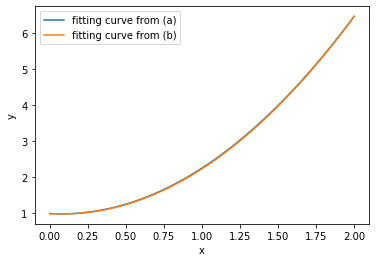

In [42]:
xlist = np.linspace(0, 2, 1000)
plt.plot(xlist, a1+a2*xlist+a3*xlist**2, label = 'fitting curve from (a)')
plt.plot(xlist, a1_cal+a2_cal*xlist+a3_cal*xlist**2, label = 'fitting curve from (b)')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')


2D 2차 답안지 가져 온거 ㅅ

In [43]:
x, y, sigma = np.loadtxt('final-p3.txt', unpack=True, usecols=[0, 1, 2])

def func(x): 
    return (((x[0] **2. ) -10. *x[1]) **2. ) +2. *(x[1] **2. ) -3. *x[0]


def golden2D(x,dr,tol):
    R,err,loop=0.61803399, 10. , -1 
    a,b=x-dr,x+dr # initialize the range 
    while(err > TOL): 
        loop += 1 
        x1,x2=b-R*(b-a) ,a+R*(b-a) 
        f1,f2=func(x1), func(x2) 
        if (f2>f1): 
            b=x2
        else: 
            a=x1
        err=np. sqrt(sum((a-b) **2))
    xmin=a
    return xmin,err,loop

P0=np. array([-5. , 2. ]) 
xt,yt=np. array([P0[0]]),np. array([P0[1]])

u=np. array([[1. , 0. ],[0. , 1. ]]) # Cartesian unit vectors 
ut = u
loop=0 
err, TOL = 1.0, 1.0e-6 
while err>TOL: 
    loop+=1 
    u1,u2=u[0],u[1] # Initialize set of directions
    #Step 2
    P1,err1,loop1 = golden2D(P0,u1, 1.0e-6) 
    P2,err2,loop2 = golden2D(P1,u2, 1.0e-6)
    #Step 3
    u1 = u2
    u2 = (P2-P0) /np. sqrt(sum((P2-P0) **2. )) # Unit vector로 변환
    u = np. vstack((u1,u2)) 
    ut = np. vstack((ut,u2))
    #Step 4
    newP0,err_lp,loop_lp = golden2D(P2,u2, 1.0e-6)
    err = np. sqrt(sum((newP0-P0) **2. ))
    P0 = newP0
    xt,yt=np. append(xt,P0[0]),np. append(yt,P0[1])
    print (P0,loop)

[-4.37203167  1.9359929 ] 1
[-3.53305719  1.21272531] 2
[-2.71336837  0.6110052 ] 3
[-1.73980384  0.23641951] 4
[-1.11548984  0.01276336] 5
[-0.11170493 -0.04311622] 6
[ 0.48120668 -0.07560684] 7
[1.45718594 0.1422836 ] 8
[1.98767424 0.28715387] 9
[2.86426117 0.80741815] 10
[3.23796681 1.01004247] 11
[3.35952724 1.10741181] 12
[3.36933169 1.11298003] 13
[3.36933163 1.11298012] 14
